In [4]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

In [5]:
#Load the data
data = pd.read_csv("Pathogen detection Salmonella enterica.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558819 entries, 0 to 558818
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   #Organism group      558819 non-null  object 
 1   Strain               521387 non-null  object 
 2   Isolate identifiers  558784 non-null  object 
 3   Serovar              271462 non-null  object 
 4   Isolate              558819 non-null  object 
 5   Create date          558819 non-null  object 
 6   Location             493793 non-null  object 
 7   Isolation source     266861 non-null  object 
 8   Isolation type       519107 non-null  object 
 9   SNP cluster          503772 non-null  object 
 10  Min-same             465867 non-null  float64
 11  Min-diff             373323 non-null  float64
 12  BioSample            558813 non-null  object 
 13  Assembly             468778 non-null  object 
 14  AMR genotypes        543238 non-null  object 
 15  Computed types   

In [9]:
#Check for missing data
data_cleaned = data.dropna()
data_cleaned.reset_index(drop=True, inplace=True)
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130668 entries, 0 to 130667
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   #Organism group      130668 non-null  object 
 1   Strain               130668 non-null  object 
 2   Isolate identifiers  130668 non-null  object 
 3   Serovar              130668 non-null  object 
 4   Isolate              130668 non-null  object 
 5   Create date          130668 non-null  object 
 6   Location             130668 non-null  object 
 7   Isolation source     130668 non-null  object 
 8   Isolation type       130668 non-null  object 
 9   SNP cluster          130668 non-null  object 
 10  Min-same             130668 non-null  float64
 11  Min-diff             130668 non-null  float64
 12  BioSample            130668 non-null  object 
 13  Assembly             130668 non-null  object 
 14  AMR genotypes        130668 non-null  object 
 15  Computed types   

In [4]:
#check for number of unique value data in the columns
unique_group = data_cleaned['#Organism group'].nunique()
unique_strain = data_cleaned['Strain'].nunique()
Isolate_identifier = data_cleaned['Isolate identifiers'].nunique()
unique_serovar = data_cleaned['Serovar'].nunique()
unique_isolate = data_cleaned['Isolate'].nunique()
unique_location = data_cleaned['Location'].nunique()
unique_source = data_cleaned['Isolation source'].nunique()
unique_cluster = data_cleaned['SNP cluster'].nunique()
unique_same = data_cleaned['Min-same'].nunique()
unique_diff = data_cleaned['Min-diff'].nunique()
unique_sample = data_cleaned['BioSample'].nunique()
unique_assembly = data_cleaned['Assembly'].nunique()
unique_genotypes = data_cleaned['AMR genotypes'].nunique()
unique_computed = data_cleaned['Computed types'].nunique()

unique_group,unique_strain,Isolate_identifier,unique_serovar,unique_isolate,unique_location,unique_source,unique_cluster,unique_same, unique_diff, unique_sample,unique_assembly, unique_genotypes, unique_computed

(1,
 130033,
 130640,
 663,
 130659,
 527,
 2911,
 3014,
 71,
 97,
 130643,
 130659,
 6921,
 369)

In [5]:
# process the date add into only the year it was added
data_cleaned['Create date'] = pd.to_datetime(data_cleaned['Create date'])
data_cleaned['Year'] = data_cleaned['Create date'].dt.year
data_cleaned = data_cleaned.drop('Create date', axis = 1)


In [6]:
encoder = LabelEncoder()
data_cleaned['#Organism group'] = encoder.fit_transform(data_cleaned['#Organism group'])
data_cleaned['Strain'] = encoder.fit_transform(data_cleaned['Strain'])
data_cleaned['Isolate identifiers']=encoder.fit_transform(data_cleaned['Isolate identifiers'])
data_cleaned['Serovar'] = encoder.fit_transform(data_cleaned['Serovar'])
data_cleaned['Isolate'] = encoder.fit_transform(data_cleaned['Isolate'])
data_cleaned['Year'] = encoder.fit_transform(data_cleaned['Year'])
data_cleaned['Location'] = encoder.fit_transform(data_cleaned['Location'])
data_cleaned['Isolation source'] = encoder.fit_transform(data_cleaned['Isolation source'])
data_cleaned['Isolation type'] = encoder.fit_transform(data_cleaned['Isolation type'])
data_cleaned['SNP cluster'] = encoder.fit_transform(data_cleaned['SNP cluster'])
data_cleaned['BioSample'] = encoder.fit_transform(data_cleaned['BioSample'])
data_cleaned['Assembly'] = encoder.fit_transform(data_cleaned['Assembly'])
data_cleaned['Computed types'] = encoder.fit_transform(data_cleaned['Computed types'])

In [7]:
#separate the Genes from its status
# add new columns for only genes
data_cleaned['Genes'] = data_cleaned['AMR genotypes'].apply(lambda x: [gene.split('=')[0] for gene in x.split(',') if 'status' not in gene])
data_cleaned['Genes'] = data_cleaned['Genes'].apply(lambda x: ','.join(x))
data_cleaned = data_cleaned.drop('AMR genotypes', axis = 1)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Normalize the features
data_normalized = scaler.fit_transform(data_cleaned.select_dtypes(include=['number']))
data_normalized = pd.DataFrame(data_normalized, columns=data_cleaned.select_dtypes(include=['number']).columns, index=data_cleaned.index)

# Concatenate the data with original dataset
data_cleaned = pd.concat([data_cleaned.select_dtypes(exclude=['number']), data_normalized], axis=1)

In [10]:

#the select X feature variables
X = data_cleaned.drop(['Genes'], axis=1)
#target variable
y = data_cleaned['Genes']
X.columns

Index(['#Organism group', 'Strain', 'Isolate identifiers', 'Serovar',
       'Isolate', 'Location', 'Isolation source', 'Isolation type',
       'SNP cluster', 'Min-same', 'Min-diff', 'BioSample', 'Assembly',
       'Computed types', 'Year'],
      dtype='object')

In [11]:
#  Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((91461, 15), (39198, 15), (91461,), (39198,))

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
sample_size = 10000  
X_train_sampled = X_train.sample(sample_size, random_state=42)
y_train_sampled = y_train.sample(sample_size, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators =100, random_state = 42)
model.fit(X_train_sampled, y_train_sampled)

RandomForestClassifier(random_state=42)

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: ',accuracy)
print(f'Precision: ',precision)
print(f'Recall: ', recall)
print(f'The f1score: ',f1)



Accuracy:  0.6777896831470993
Precision:  0.6906546961811636
Recall:  0.6777896831470993
The f1score:  0.649606332589892


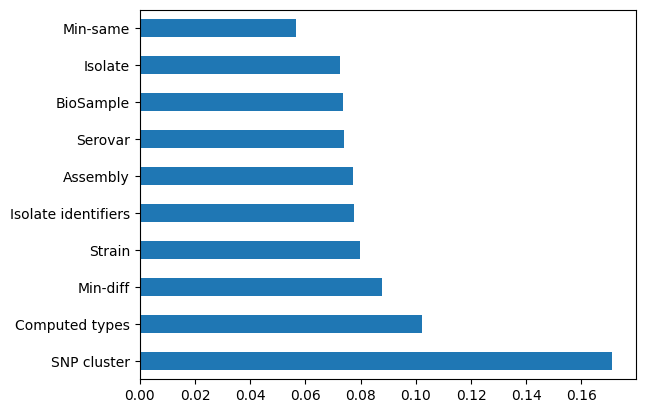

In [16]:
feature_importance = pd.Series(model.feature_importances_, index = X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.show()

In [17]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion ='entropy', random_state = 42, max_depth = 10)
# Train the model
model.fit(X_train_sampled, y_train_sampled)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [18]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
print(f'Accuracy: ',accuracy)
print(f'Precision: ',precision)
print(f'Recall: ', recall)
print(f'The f1score: ',f1)

Accuracy:  0.6604673707842237
Precision:  0.7306390781491822
Recall:  0.6604673707842237
The f1score:  0.6468412127524155


In [19]:
#Logistic Regression model
model = LogisticRegression(max_iter = 100, random_state=42)

# Train the model
model.fit(X_train_sampled, y_train_sampled)

C:\Users\enock_kipchumba\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [20]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print(f'Accuracy: ',accuracy)
print(f'Precision: ',precision)
print(f'Recall: ', recall)
print(f'The f1score: ',f1)

Accuracy:  0.5227307515689577
Precision:  0.581511958725749
Recall:  0.5227307515689577
The f1score:  0.4496304028520867


In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20, metric='manhattan', weights ='distance')
knn.fit(X_train_sampled, y_train_sampled)

KNeighborsClassifier(metric='manhattan', n_neighbors=20, weights='distance')

In [22]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
print(f'Accuracy: ',accuracy)
print(f'Precision: ',precision)
print(f'Recall: ', recall)
print(f'The f1score: ',f1)

Accuracy:  0.6088320832695545
Precision:  0.6369516600817287
Recall:  0.6088320832695545
The f1score:  0.5581826807437199


In [23]:
from sklearn.model_selection import cross_val_score
accuracy_rate = []
for i in range(1,30):   
    knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    score=cross_val_score(knn,X_train_sampled,y_train_sampled,cv=2)
    accuracy_rate.append(score.mean())

C:\Users\enock_kipchumba\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\enock_kipchumba\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\enock_kipchumba\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\enock_kipchumba\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\enock_kipchumba\AppData\Local\Programs\Python\Python310

Text(0, 0.5, 'Accuracy')

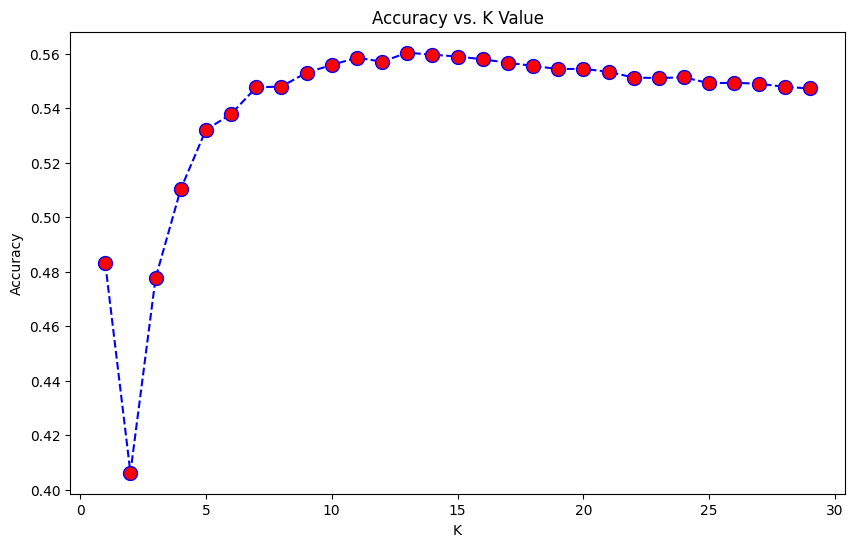

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')